In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
import keras_tuner as kt 
import seaborn as sb 

In [18]:
data=pd.read_csv('books_data_t.csv')
rating = pd.read_csv('Books_rating_t.csv')

In [19]:
data_sample = data.sample(n=10000, random_state=42)
rating_sample = rating.sample(n=10000, random_state=42)

In [20]:
data_sample.isnull().values.any()
print('Features manquants: ', data_sample.isnull().sum())

Features manquants:  Titre                  0
Description         3197
Auteurs             1502
Image               2447
Lien Google         1121
Editeur             3549
Date publication    1176
infoLink            1121
Genre               1942
Nb scores           7653
dtype: int64


In [21]:
data_sampleNA=data_sample

In [22]:
data_sampleNA.dropna(inplace=True)
data_sampleNA.isnull().values.any()
print('Features manquants: ', data_sampleNA.isnull().sum())


Features manquants:  Titre               0
Description         0
Auteurs             0
Image               0
Lien Google         0
Editeur             0
Date publication    0
infoLink            0
Genre               0
Nb scores           0
dtype: int64


In [23]:
data = data_sampleNA['Genre']
df = pd.DataFrame(data)
df_exploded = df.explode('Genre')
unique_genres = df_exploded['Genre'].unique().tolist()

C:\Users\flori\AppData\Local\Temp\ipykernel_528\2257172711.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  positive_ratings_by_genre = data_sampleNA[positive_ratings_filter].groupby('Genre')['Nb scores'].count()


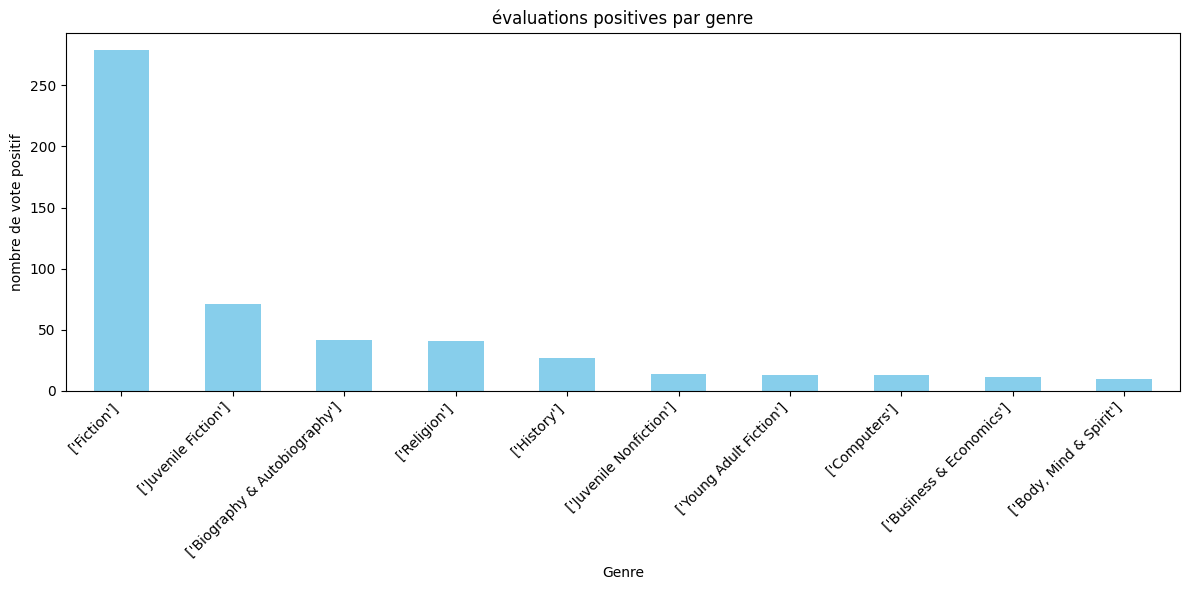

In [24]:
data_sampleNA['Genre'] = data_sampleNA['Genre'].astype('category')
positive_ratings_filter = data_sampleNA['Nb scores'] > 3
positive_ratings_by_genre = data_sampleNA[positive_ratings_filter].groupby('Genre')['Nb scores'].count()
sorted_genres = positive_ratings_by_genre.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sorted_genres=sorted_genres.head(10)
sorted_genres.plot(kind='bar', color='skyblue')
plt.title("évaluations positives par genre")
plt.xlabel("Genre")
plt.ylabel("nombre de vote positif")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\flori\AppData\Local\Temp\ipykernel_528\685264704.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  positive_ratings_by_genre = data_sampleNA[positive_ratings_filter].groupby('Genre')['Nb scores'].count()


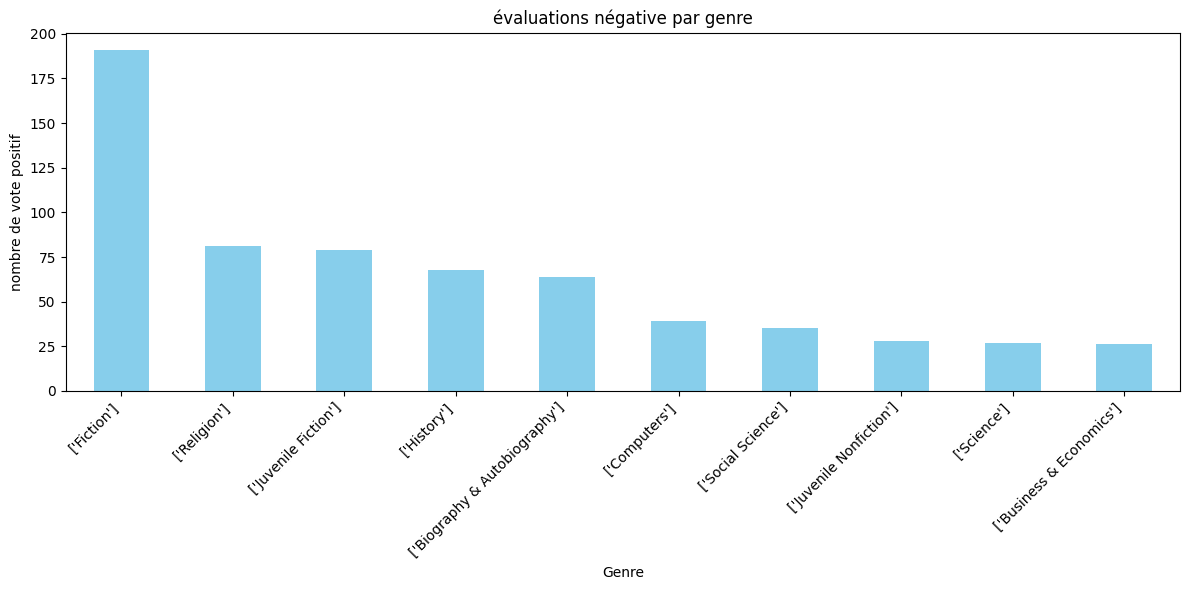

In [25]:
positive_ratings_filter = data_sampleNA['Nb scores'] < 3
positive_ratings_by_genre = data_sampleNA[positive_ratings_filter].groupby('Genre')['Nb scores'].count()
sorted_genres = positive_ratings_by_genre.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sorted_genres=sorted_genres.head(10)
sorted_genres.plot(kind='bar', color='skyblue')
plt.title("évaluations négative par genre")
plt.xlabel("Genre")
plt.ylabel("nombre de vote positif")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [26]:
X=rating_sample[['Titre','revue/heure','revue/résumé','revue/texte']]
y=rating_sample['revue/score']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Search space summary
Default search space size: 5
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 5, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 200, 'step': 16, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
learning_rate (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.1, 'step': None, 'sampling': 'linear'}
optimizer (Choice)
{'default': 'Adam', 'conditions': [], 'values': ['Adam', 'Adamax', 'SGD', 'Adagrad'], 'ordered': False}


Trial 2 Complete [00h 00m 00s]

Best val_accuracy So Far: None
Total elapsed time: 00h 00m 01s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
4                 |1                 |num_layers
160               |112               |units_0
relu              |relu              |activation
0.03248           |0.054188          |learning_rate
Adagrad           |Adam              |optimizer
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
0                 |0                 |tuner/round



Traceback (most recent call last):
  File "C:\Users\flori\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras_tuner\src\engine\base_tuner.py", line 273, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "C:\Users\flori\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras_tuner\src\engine\base_tuner.py", line 238, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\flori\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras_tuner\src\tuners\hyperband.py", line 427, in run_trial
    return super().run_trial(trial, *fit_args, **fit_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  Fi

RuntimeError: Number of consecutive failures exceeded the limit of 3.
Traceback (most recent call last):
  File "C:\Users\flori\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras_tuner\src\engine\base_tuner.py", line 273, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "C:\Users\flori\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras_tuner\src\engine\base_tuner.py", line 238, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\flori\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras_tuner\src\tuners\hyperband.py", line 427, in run_trial
    return super().run_trial(trial, *fit_args, **fit_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\flori\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras_tuner\src\engine\tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\flori\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras_tuner\src\engine\tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\flori\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras_tuner\src\engine\hypermodel.py", line 149, in fit
    return model.fit(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\flori\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\flori\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tensorflow\python\framework\constant_op.py", line 103, in convert_to_eager_tensor
    return ops.EagerTensor(value, ctx.device_name, dtype)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).
